<img src="https://bioinf.nl/~davelangers/hanze.png" align="right" />

# <span id="0">Casus *Hidden Markov Model* - Deel I</span>

Inhoud:

* **<a href="#1">CpG-islands (CGIs)</a>**

* **<a href="#2">Hidden Markov Models</a>**

* **<a href="#3">CpG-eiland en non-CpG-eiland sequenties</a>**

* **<a href="#4">Toy-data</a>**

* **<a href="#5">Je eigen `HiddenMarkovModel` class</a>**

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import numpy as np

<a id="1" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### CpG-islands (CGIs)

CpG-eilandjes zijn elementen in het genoom die een grote invloed uitoefenen op de regulatie van genexpressie door DNA-methylatie. Hun rol in kankerontwikkeling door abnormale methylatie van tumorsuppressorgenen en oncogenen maakt het een doelwit voor diagnostische en therapeutische benaderingen. Begrip van de dynamiek van CpG-eilandjes biedt inzicht in de moleculaire mechanismen van kanker en mogelijkheden voor innovatieve behandelingsstrategieën.

CpG-eilandjes zijn gebieden in het DNA die een hoge dichtheid hebben aan CpG-dinucleotiden, waarbij "CpG" staat voor een cytosine nucleotide (C) gevolgd door een guanine nucleotide (G) verbonden door een fosfaatgroep (p). Deze eilanden zijn meestal ongewoon rijk aan de CG-combinatie en bevatten vaak geen gemethyleerde cytosines, wat hen onderscheidt van de rest van het genoom waar CpG dinucleotiden vaak gemethyleerd zijn en daardoor minder frequent voorkomen. CpG-eilandjes komen vaak voor in of nabij de promotorregio's van genen, die de expressie van de corresponderende genen reguleren. Ze zijn typisch een paar honderd tot een paar duizend basenparen lang en hebben een GC-gehalte van meer dan 50%, met een CpG-dichtheid hoger dan wat gemiddeld is voor het genoom.

CpG-eilandjes spelen een cruciale rol bij de regulatie van genexpressie via hun invloed op DNA-methylatie, een epigenetisch mechanisme. Dit proces voegt een methylgroep toe aan het cytosine-residu in CpG-dinucleotiden, meestal door de werking van DNA-methyltransferasen. In promotorregio's is methylatie vaak geassocieerd met gen-silencing omdat het de binding van transcriptiefactoren en andere noodzakelijke eiwitten voor genexpressie ontmoedigt. Omgekeerd kan het demethyleren van CpG-eilandjes de expressie van geassocieerde genen activeren, aangezien het de toegankelijkheid van transcriptiefactoren en RNA-polymerase vergroot.

<img src="https://media.licdn.com/dms/image/D4D22AQEdqGnu8ZC80Q/feedshare-shrink_2048_1536/0/1684682580953?e=2147483647&v=beta&t=r6jlPalFOi_YDqJ_tBSPkdZRlvfakvmH1DVf9bnTTEk" width="40%" heigth="40%" />

De epigenetische modificatie van CpG-eilandjes speelt een belangrijke rol in kankerontwikkeling door abnormale genexpressie. In kankercellen worden CpG-eilandjes in de promotorregio's van tumorsuppressorgenen vaak hypergemethyleerd. Dit leidt tot silencing van deze genen, wat bijdraagt aan ongecontroleerde celgroei en proliferatie. Voorbeelden van tumorsuppressorgenen die vaak gehypermethyleerd zijn in kanker omvatten *p16INK4a* en *BRCA1*. Globale hypomethylatie van het genoom kan ook voorkomen in kankercellen, wat resulteert in genomische instabiliteit en de activatie van oncogenen. Dit draagt bij aan tumorvorming en -progressie.

Abnormale methylatiepatronen van CpG-eilandjes kunnen dienen als biomarkers voor de vroege detectie en diagnose van kanker. Epigenetische therapieën, zoals DNA-methylatie-inhibitoren (bijv. azacitidine en decitabine), worden gebruikt om abnormale methylatie om te keren en de normale expressie van tumorsuppressorgenen te herstellen.

Bekijk onderstaande inleidende video en schrijf er een samenvatting van. Zoek zo nodig zelf uitgebreidere achtergrondinformatie over onbekende onderwerpen en vermeld deze bronnen in je samenvatting als referenties. Neem onder andere de bijbehorende [Wikipedia](https://en.wikipedia.org/wiki/CpG_site) pagina door.

In [20]:
%%html
<iframe width="640" height="360" src="https://www.youtube.com/embed/bc3wtVXyAXo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Samenvatting **CpG-islands video**
De video begint met de definitie: een CpG-eiland is een regio in het DNA met een relatief hoge dichtheid aan het “CpG”-dinucleotide (een cytosine gevolgd door een guanine via een fosfaatgroep). Als nucleotiden volledig willekeurig verdeeld zouden zijn, zou je verwachten dat een CpG-dinucleotide ongeveer 6,25% van alle dinucleotiden vormt (0,25 × 0,25). In werkelijkheid komt CpG echter veel minder vaak voor, dichter bij 1%, omdat gemethyleerd cytosine in CpG-context vaker muteert naar thymine.<br>
CpG-eilanden vormen hiervan een duidelijke uitzondering: dit zijn regio’s waar CpG-dinucleotiden juist sterk oververtegenwoordigd zijn. Ze liggen vaak in of nabij promotorregio’s van genen en spelen een belangrijke rol in de regulatie van genexpressie.<br>
Typisch voldoen CpG-eilanden aan drie criteria, een lengte van minstens 200 baseparen,een GC-gehalte van ≥ 50%en een CpG-ratio van ≥ 60% (ten opzichte van de verwachte frequentie).
Deze combinatie maakt CpG-eilanden duidelijk herkenbare structuren in het genoom, die functioneel vaak van groot belang zijn.
### Methylatie en genregulatie
In het grootste deel van het genoom zijn CpG-dinucleotiden sterk gemethyleerd. Methylatie — het toevoegen van een CH₃-groep aan cytosine — is een epigenetische modificatie die meestal leidt tot onderdrukking van genexpressie.
In CpG-eilanden, vooral die in of bij promotors liggen, blijven cytosines echter meestal ongemethyleerd. Hierdoor blijft de chromatinestructuur open en zijn deze regio’s toegankelijk voor transcriptiefactoren en RNA-polymerase. CpG-eilanden dragen zo direct bij aan actieve genexpressie.

Buiten CpG-eilanden worden cytosines in CpG-context doorgaans gemethyleerd. Deze gemethyleerde C’s ondergaan regelmatig spontane deaminatie, waarbij cytosine wordt omgezet in uracil (U), of in het geval van 5-methylcytosine zelfs direct in thymine (T). De C→U-mutatie kan meestal worden hersteld door het cellulaire DNA-reparatiesysteem, maar C→T-mutaties worden vaak niet herkend, omdat thymine een normale DNA-base is. Hierdoor verdwijnen CpG-dinucleotiden geleidelijk uit het genoom. In CpG-eilanden, waar cytosines ongemethyleerd zijn, treedt deze mutatie vrijwel niet op, waardoor CpG daar behouden blijft.
### X-chromosoominactivatie
De video vermeldt ook dat CpG-eilandjes betrokken zijn bij X-chromosoominactivatie bij vrouwelijke zoogdieren. Tijdens dit proces wordt één van de twee X-chromosomen epigenetisch uitgeschakeld. Hierbij raken CpG-eilanden op het inactieve X-chromosoom vaak gemethyleerd, waardoor genexpressie wordt onderdrukt. CpG-eilanden functioneren dus als epigenetische schakelaars die kunnen bepalen of genen actief of inactief zijn.
### CpG-islands en kanker
De video bespreekt hoe CpG-eilandjes betrokken zijn bij kankerontwikkeling. In veel tumoren worden CpG-eilanden in promotors van belangrijke tumorsuppressorgenen abnormaal hypermethyleerd. Dit leidt tot permanente gen-silencing en draagt bij aan ongecontroleerde celgroei.Aan de andere kant vertonen kankercellen vaak globale hypomethylatie, wat leidt tot genomische instabiliteit en de activatie van oncogenen of transposons. Beide processen—hypermethylatie van promotors en hypomethylatie elders—spelen samen een rol in tumorvorming.

<a id="2" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Hidden Markov Models

CpG-eilandjes kunnen worden gedetecteerd met behulp van verschillende computationele methoden, waarvan een van de meest effectieve methoden het gebruik van Hidden Markov Models (HMMs) is.

Een Hidden Markov Model is een krachtig hulpmiddel voor het modelleren van tijdreeksen en sequentiële data waarin de werkelijke toestanden niet direct zichtbaar zijn, maar waar de uitkomsten afhankelijk zijn van deze toestanden. HMMs maken gebruik van probabilistische berekeningen om te schatten welke verborgen toestanden het meest waarschijnlijk zijn gegeven de waargenomen data, wat ze tot een waardevol instrument maakt in een breed scala aan toepassingen. HMMs worden breed toegepast in verschillende domeinen van de bioinformatica, maar ook bijvoorbeeld in spraakherkenning en natuurlijke taalverwerking of financiële modellering van markttendensen.

Hidden Markov Models zijn zeer geschikt voor de detectie van CpG-eilandjes vanwege hun vermogen om sequenties te modelleren en patronen te herkennen in biologische data. In het kader van CpG-eilandjes vormen de verschillende nucleotiden in het DNA de waargenomen data, en is de aanwezigheid van een CpG-eiland, al dan niet, de verborgen toestand. Door het toepassen van HMMs kunnen wetenschappers efficiënt de locatie van CpG-eilandjes bepalen, wat waardevolle inzichten biedt in genregulatie en kankeronderzoek.

<img src="https://www.researchgate.net/profile/Tomer-Toledo/publication/245563174/figure/fig1/AS:669081116094471@1536532777801/State-transition-diagram-of-a-hidden-Markov-model.png" width="40%" height="40%" />

Een HMM wordt gekarakteriseerd door de volgende eigenschappen:

* **Toestanden / States** Een gegeven aantal verschillende verborgen interne toestanden waarin een geobserveerd systeem zich kan bevinden. In de context van CpG-eilandjesdetectie kunnen de toestanden bijvoorbeeld "in een CpG-eiland" en "buiten een CpG-eiland" zijn.

* **Overgangswaarschijnlijkheden / Transition probabilities** De kans dat het systeem van de ene toestand naar de andere overgaat. Bijvoorbeeld, de kansen om van "buiten een CpG-eiland" naar "in een CpG-eiland" te veranderen, en omgekeerd, of de kansen om binnen dezelfde toestand te blijven.

* **Emissiekansen / Emission probabilities** De kans om een bepaalde uitkomst te observeren vanuit een gegeven toestand. Voor CpG-eilandjes zijn dit de kansen van het voorkomen van verschillende nucleotiden (A, T, C, G) zowel in als buiten de eilandjes.

* **Begintoestandsverdeling / Start probabilities** De initiële waarschijnlijkheden dat het systeem dat zich in een bepaalde toestand bevindt. Een DNA-sequentie kan met zekere kans beginnen met een CpG-eilandje, of niet.

Een HMM maakt, net als elk model, diverse aannamen die de analyse van gegevens vereenvoudigen. De belangrijkste aannamen van een HMM zijn dat (1) het waargenomen systeem zich alléén in een discreet (d.w.z. eindig) aantal verschillende toestanden kan bevinden die variëren in de loop van de reeks, (2) dat de waarnemingen die aan het systeem gedaan worden alléén afhangen van de huidige toestand van het systeem, en (3) dat de kansverdeling omtrent wat de toestand van het systeem op een volgend moment gaat zijn alléén afhangt van wat de toestand van het systeem op een voorgaand moment was.

De toestand van het systeem is zelf niet rechtstreeks waarneembaar; wel waarneembaar zijn de emissies die afhangen van de toestand. De meestgestelde vraag die een HMM kan proberen te beantwoorden is: "gegeven een serie waarnemingen, wat waren de meest waarschijnlijke onderliggende toestanden van het systeem"? Bijvoorbeeld, in ons geval: "gegeven een nucleotidesequentie, welke delen vallen in een CpG-eiland en welke vallen erbuiten"?

Bekijk onderstaande inleidende video en schrijf er een samenvatting van. Zoek zo nodig zelf uitgebreidere achtergrondinformatie over onbekende onderwerpen en vermeld deze bronnen in je samenvatting als referenties. Neem onder andere de bijbehorende [Wikipedia](https://en.wikipedia.org/wiki/Hidden_Markov_model) pagina door.

In [4]:
%%html
<iframe width="640" height="360" src="https://www.youtube.com/embed/fX5bYmnHqqE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

# UITWERKING
## Hidden markov Model

### Transitie probabilities
wordt vaak weergegeven in tabel vorm en geeft weer wat de kansen zijn dat het systeem van toestand A naar B gaat. Dit corrospondeerd met de "hidden states". Alleen de emissies, observaties, zijn zichtbaar, de staten niet. Zo zijn de staten in ons voorbeeld: wel / niet een CpG-i.

### Emission probabilities
Ook weergegeven in tabel en geeft weer wat de kans is om een uitkomst te observeren bij een gegeven toestand. Deze zijn observeerbaar. De hidden states bepalen de kans op emissies, en die emissies zijn de enige dingen die we daadwerkelijk observeren. Dit zijn bijvoorbeeld de nucleotiden. 

Als we deze 2 dingen samen nemen kunnen we via kansen bekijken hoe groot de kans van een staat is aan de hand van de emissies.

Dit kan gedaan worden met:

$$
\hat{X}_{1:N}
    = \arg\max_{x_{1:N}}
        P(x_{1:N} \mid y_{1:N})

$$

Hierbij:

- X is een hidden staat bij reeks N
- Y is geobserveerde data bij reeks N

Je wil kijken naar welke combinatie van hidden states 1..N de hoogste kans hebben. Zo kan je zeggen dat de kans om observaties yN samen met staten xN maximaal is. De hoogste kans sequentie van staten. De formule kan snel met veel waarden ingevuld worden en snel complex worden. Om hier mee om te gaan zijn er een aantal aannames die het model doet.
### Aanname
- De emissie hangt alleen af van de momentele staat
- Markov assumptie: De volgende staat hangt alleen af van de momentele staat

Door middel van de transitie en emissie tabellen kan je deze kansen invullen, en keer elkaar doen. Hieruit komen de staten met de hoogste kans bij reeks N.




<a id="3" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### CpG-eiland en non-CpG-eiland sequenties

De onderstaande tabellen geven de experimentele waarschijnlijkheden aan dat een zekere nucleotide (in de rijen) gevolg wordt door een zekere andere nucleotide (in de kolommen) binnen en buiten CpG-eilanden.

Bron: "Biological sequence analysis - Probabilistic models of proteins and nucleic acids", Durbin et al. (1998), hoofdstuk 3, p50-51 ([ref](http://www.mcb111.org/w06/durbin_book.pdf)).

*CGI* (`+`)

|  `+`  |   A   |   C   |   G   |   T   |
| :---: | :---: | :---: | :---: | :---: |
| **A** | 0.180 | 0.274 | 0.426 | 0.120 |
| **C** | 0.171 | 0.368 | 0.274 | 0.188 |
| **G** | 0.161 | 0.339 | 0.375 | 0.125 |
| **T** | 0.079 | 0.355 | 0.384 | 0.182 |

*non-CGI* (`-`)

|  `-`  |   A   |   C   |   G   |   T   |
| :---: | :---: | :---: | :---: | :---: |
| **A** | 0.300 | 0.205 | 0.285 | 0.210 |
| **C** | 0.322 | 0.298 | 0.078 | 0.302 |
| **G** | 0.248 | 0.246 | 0.298 | 0.208 |
| **T** | 0.177 | 0.239 | 0.292 | 0.292 |

Bijvoorbeeld, de kans dat een gegeven C gevolgd wordt door een G is slechts 7.8 % buiten een CpG-eilandje, maar neemt toe tot maar liefst 27.4 % binnen een CpG-eilandje, hetgeen benadrukt hoe sterk CpG-dinucleotiden relatief oververtegenwoordigd zijn binnen CpG-eilandjes. Ga na dat de som van de kansen in elke rij van de tabel moet sommeren tot 100% (op afrondfouten na).

Genereer met python-code een willekeurige sequentie van 300 baseparen lengte overeenkomend met een CpG-eiland en een soortgelijke sequentie van een non-CpG-eiland. Kies telkens het eerste nucleotide willekeurig, en gebruik dan de bovenstaande overgangswaarschijnlijkheden om de sequentie te verlengen. Bepaal van de gegenereerde complete sequenties de kansen op elk nucleotide ($P_A, P_C, P_G, P_T$) evenals de kansen op elk dinucleotide ($P_{AA}, P_{AC}, \ldots, P_{TT}$). Bepaal voor elk dinucleotide ook de ratios $r$ tussen de waargenomen en de verwachte kans, zoals

$$
r_{AC} = \frac{P_{AC}}{P_A \cdot P_C}
$$

Wat kun je verhoudingsgewijs zeggen over hoe vaak C en G afzonderlijk voorkomen, en hoe vaak het CpG-dinucleotide voorkomt? Welke combinaties van nucleotiden zijn het sterkst over- of ondergerepresenteerd?

In [5]:
# Zie eerste_opdracht.py

<a id="4" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Toy-data

Gegeven zijn drie tafels (overeenkomend met toestanden) die elk een grabbelton bevatten waaruit gekleurde knikkers kunnen worden getrokken (emissies) en met elk een dobbelsteen die bepaalt naar welke volgende tafel je gaat (overgangswaarschijnlijkheden).

| Tafel: |  ❶  |  ❷  |  ❸  |
| -----: | :-: | :-: | :-: |
| **Grabbelton:** | 6x blauw | 2x blauw | 1x blauw |
|                 | 3x geel  | 6x geel  | 0x geel  | 
|                 | 1x groen | 2x groen | 6x groen |
|                 | 2x rood  | 2x rood  | 5x rood  |
| **Dobbelsteen:** | ⚀→① | ⚀→① | ⚀→① |
|                  | ⚁→② | ⚁→② | ⚁→① |
|                  | ⚂→② | ⚂→② | ⚂→① |
|                  | ⚃→② | ⚃→③ | ⚃→① |
|                  | ⚄→③ | ⚄→③ | ⚄→② |
|                  | ⚅→③ | ⚅→③ | ⚅→③ |

Beginnend bij een willekeurige tafel, trek individueel een knikker en noteer de kleur samen met het nummer van de tafel. Gebruik de dobbelsteen om te bepalen naar welke volgende tafel je gaat. Herhaal dit tot je ongeveer een dertigtal waarnemingen hebt gegenereerd en je weer precies terug bent gekomen bij de tafel waar je was begonnen.

Bijvoorbeeld:
| **Beurt:** | 1     | 2     | 3     | 4     | 5     | 6     | 7     | ... | 30    |
| ---------: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :-: | :---: |
| **Tafel:** | ❷     | ❸     | ❶     | ❸     | ❷     | ❷     | ❶     | ... | ❸     |
| **Kleur:** | geel  | groen | blauw | rood  | groen | geel  | blauw | ... | rood  |
| **Worp:**  | ⚃     | ⚀     | ⚄     | ⚄     | ⚂     | ⚀     | ⚂     | ... | ⚄     |

Naast het bepalen van je eigen sequentie, combineer de waarnemingen van al je klasgenoten tot één lange sequentie.

<a id="5" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Je eigen `HiddenMarkovModel` class

Maak een eigen module-bestand genaamd `hmmmodel.py` aan en definieer daarin een klasse `HiddenMarkovModel`. Deze klasse dient een begintoestandsverdeling, overgangswaarschijnlijkheden, en emissiekansen te kunnen bevatten. De klasse dient verder een methode `sample()` te hebben die het mogelijk maakt om een gevraagd aantal waarnemingen te genereren op basis van een gegeven Hidden Markov Model. Voeg implementaties van een aantal standaard dunder-methoden toe (`__init__()`, `__str__()`, `__repr__()`).

Implementeer de functionaliteit van je eigen module zodanig dat deze grotendeels compatibel is met de `CategoricalHMM` klasse van de `hmmlearn` module waarvan je de documentatie [online](https://hmmlearn.readthedocs.io/en/latest/api.html#categoricalhmm) kan vinden. Deze module zit niet in de standaard library van python en dien je zelf wellicht nog te installeren. Merk op dat niet alle functionaliteit uit deze klasse hoeft te worden geïmplementeerd. Vooralsnog gaat het voornamelijk om initialisatie en de `sample()` methode. Later voegen we nog meer methoden aan je klasse toe.

Gebruik je eigen module om sequenties van 1200 toestanden en bijbehorende waarnemingen te genereren voor de eerdere toy-data. De tafelnummers zijn daarin de toestanden en de kleuren knikkers zijn de emissies. Dit zou moeten kunnen met code zoals hieronder.

```python
#from hmmmodel import HiddenMarkovModel as HMM
#model = HMM(n_components=..., n_features=...)
#model.startprob_ = ...
#model.transmat_ = ...
#model.emissionprob_ = ...
#emissions, states = model.sample(1200)
#print(model)
```

Toon histogrammen van de toestanden en emissies voor al deze sequenties, en schat *op basis van de gegenereerde sequentie* de overgangswaarschijnlijkheden en emissiekansen. Ga na of deze goed overeenkomen met de instellingen van het Hidden Markov Model.

Vergelijk tenslotte of je eigen klasse soortgelijke resultaten geeft als `hmmlearn.hmm.CategoricalHMM` (d.w.z. met soortgelijke code als hierboven, maar met `from hmmlearn.hmm import CategoricalHMM as HMM`).

In [6]:
from hmmmodel import HiddenMarkovModel
import numpy as np
model = HiddenMarkovModel(3,4)
model.startprob_ = np.array([0.8,0.1,0.1])
model.transmat_ = transmat = np.array([
    [0.5, 0.3, 0.2],
    [0.2, 0.6, 0.2],
    [0.3, 0.3, 0.4]
])
model.emissionprob_ = emissionprob = np.array([
    [0.1, 0.4, 0.3, 0.2],
    [0.3, 0.2, 0.2, 0.3],
    [0.25, 0.25, 0.25, 0.25]
])
emissions, states = model.sample(1200)
print(model)


HiddenMarkovModel(n_components:3,n_features:4)

States: [0 1 1 ... 1 2 0]

Emissions: [3 3 2 ... 3 2 2]




In [7]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7f2667da2270>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

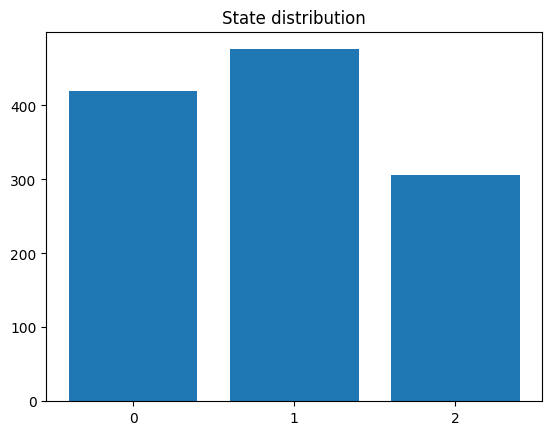

In [8]:
state_counts = np.bincount(states)
x_positions = np.arange(len(state_counts))

plt.bar(x_positions, state_counts)
plt.title("State distribution")
plt.xticks(x_positions)

([<matplotlib.axis.XTick at 0x7f2667856e90>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

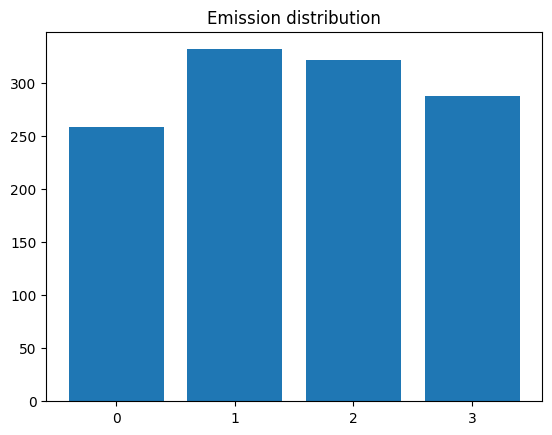

In [9]:
emission_counts = np.bincount(emissions)
x_positions_emissions = np.arange(len(emission_counts))

plt.bar(x_positions_emissions, emission_counts)
plt.title("Emission distribution")
plt.xticks(x_positions_emissions)

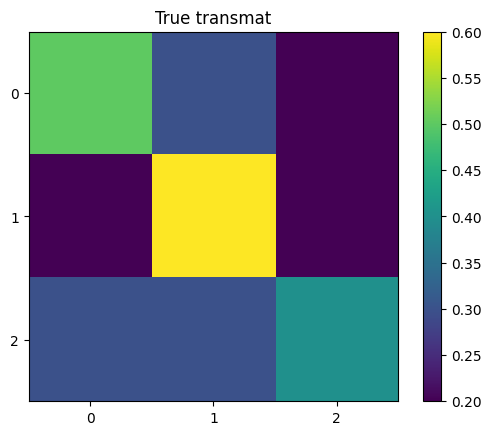

In [10]:
plt.imshow(model.transmat_)
plt.yticks(x_positions)
plt.xticks(x_positions)
plt.title("True transmat")
plt.colorbar()

In [11]:
def generate_state_observed_matrix(n, sequence):
    matrix = np.zeros((n,n))
    for (current, next_state) in zip(sequence[:-1], sequence[1:]):
        matrix[current,next_state] += 1

    sums_row = matrix.sum(axis=1, keepdims=True)
    matrix = matrix / sums_row
    return matrix

def generate_emission_observed_matrix(n_states, n_features, emissions_, states_):
    matrix = np.zeros((n_states,n_features))
    for (state, emission) in zip(states_, emissions_):
        matrix[state,emission] += 1

    sums_row = matrix.sum(axis=1, keepdims=True)
    matrix = matrix / sums_row
    return matrix



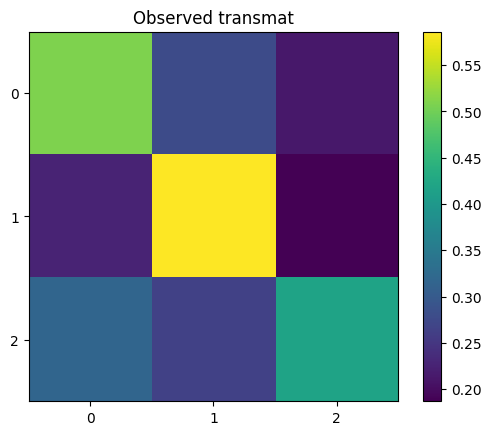

In [12]:
observed_transmat = generate_state_observed_matrix(len(state_counts), states)

plt.imshow(observed_transmat)
plt.yticks(x_positions)
plt.xticks(x_positions)
plt.title("Observed transmat")
plt.colorbar()

Je ziet duidelijk een overeenkomt tussen observed transmat en true transmat.

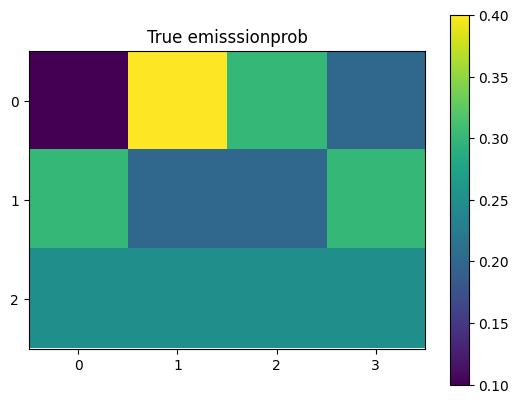

In [13]:
plt.imshow(model.emissionprob_)
plt.yticks(x_positions)
plt.xticks(x_positions_emissions)
plt.title("True emisssionprob")
plt.colorbar()

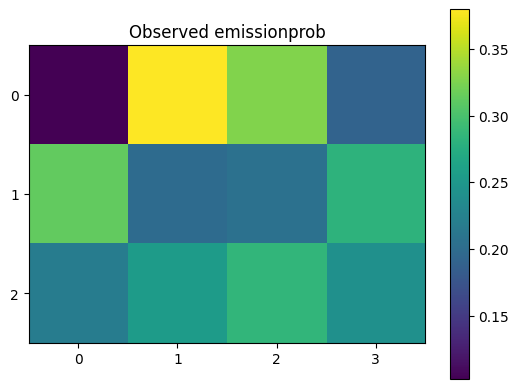

In [14]:
observed_emissionprob = generate_emission_observed_matrix(len(state_counts),len(emission_counts), emissions, states)

plt.imshow(observed_emissionprob)
plt.yticks(x_positions)
plt.xticks(x_positions_emissions)
plt.title("Observed emissionprob")
plt.colorbar()

In [15]:
from hmmlearn.hmm import CategoricalHMM as HMM

In [16]:
hmmModel = HMM(n_components=3,n_features=4)
hmmModel.startprob_ = np.array([0.8,0.1,0.1])
hmmModel.transmat_ = transmat = np.array([
    [0.5, 0.3, 0.2],
    [0.2, 0.6, 0.2],
    [0.3, 0.3, 0.4]
])
hmmModel.emissionprob_ = emissionprob = np.array([
    [0.1, 0.4, 0.3, 0.2],
    [0.3, 0.2, 0.2, 0.3],
    [0.25, 0.25, 0.25, 0.25]
])
emissions_new, states_new = hmmModel.sample(1200)
print(hmmModel)

CategoricalHMM(n_components=3, n_features=4)


Hiervan weten we dat de transmat en emissionprob hetzelfde zijn, alleen de geobserveerde kunnen anders zijn

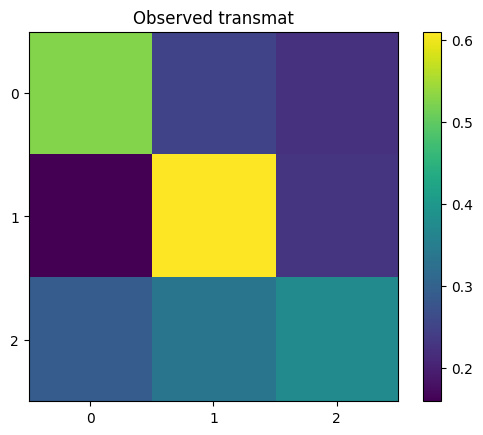

In [17]:
state_counts_new = np.bincount(states_new)
x_positions_new = np.arange(len(state_counts_new))

observed_transmat_new = generate_state_observed_matrix(len(state_counts_new), states_new)


plt.imshow(observed_transmat_new)
plt.yticks(x_positions)
plt.xticks(x_positions)
plt.title("Observed transmat")
plt.colorbar()

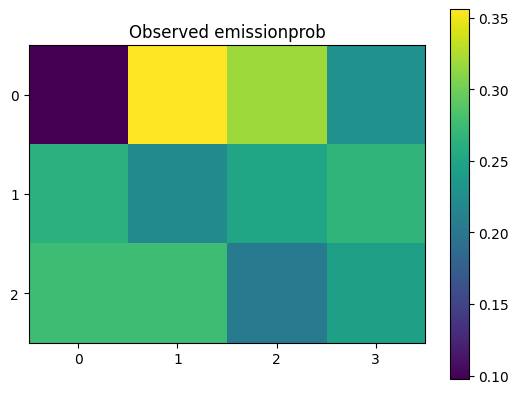

In [18]:
emissions_new = np.array(emissions_new).flatten()
emission_counts_new = np.bincount(emissions_new)
x_positions_emissions_new = np.arange(len(emission_counts_new))

observed_emissionprob_new = generate_emission_observed_matrix(len(state_counts_new),len(emission_counts_new), emissions_new, states_new)

plt.imshow(observed_emissionprob_new)
plt.yticks(x_positions_new)
plt.xticks(x_positions_emissions_new)
plt.title("Observed emissionprob")
plt.colorbar()

Hier observeren we ook dat hmmlearn vergelijkbare resultaten krijgt

***

&copy; 2025 - Dave R.M. Langers <d.r.m.langers@pl.hanze.nl>